# Project 1: Lego Database

## Story

This project is meant to help show which LEGO themes have the most number of sets. Many people who collect LEGO sets sometimes collect specific themes that they enjoy. And some have a difficult time finding sets from a certain theme, like Star Wars or Jurassic Park. This program is designed to help LEGO collectors and enthusiasts to see what the most popular LEGO themes are, and how many sets they have. 

Some questions that this data can help answer are:
- Which LEGO themes have the highest number of sets overall?
- How has the number of sets per theme changed over time?
- Are there themes with very few sets that are still highly sought after or rare?

Database from Kaggle: https://www.kaggle.com/datasets/rtatman/lego-database?resource=download&select=themes.csv


In [ ]:
!pip install numpy pandas matplotlib seaborn

## Introduce the Data

First I installed all the necessary libraries I will need to display my data above. 
After installation, I imported the four libraries below.

In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The code below reads the two csv files from the LEGO Dataset I will be using: sets.csv and themes.csv.
After reading them into their variables, I check the different columns within the sets_df. 
Knowing that we are looking for relationship between themes and their number of sets, the only columns I need is name and theme_id.

In [2]:
sets_df = pd.read_csv('sets.csv')
themes_df = pd.read_csv('themes.csv')

sets_df.columns

Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')

In [3]:
sets_df[['name', 'theme_id']]

,name,theme_id
0,Weetabix Castle,414
1,Town Mini-Figures,84
2,Castle 2 for 1 Bonus Offer,199
3,Space Mini-Figures,143
4,Space Mini-Figures,143
...,...,...
11668,"LEGO Store Grand Opening Exclusive Set, Mayfai...",408
11669,Micro White House,598
11670,"LEGO Store Grand Opening Exclusive Set, Wiesba...",408
11671,Wishing Well [Toys R Us Promo],494


Same thing is done for the themes_df below. We'll only be needing to focus on columns id and name.

In [4]:
themes_df.columns

Index(['id', 'name', 'parent_id'], dtype='object')

In [5]:
themes_df[['id', 'name']]

,id,name
0,1,Technic
1,2,Arctic Technic
2,3,Competition
3,4,Expert Builder
4,5,Model
...,...,...
609,610,Brickheadz
610,611,Series 17 Minifigures
611,612,Star Wars Episode 8
612,613,Freemakers


## Pre-Processing

To display the data, I had to merge the two dataframes into one.
I used the merge() method below, and merged them so that theme_id from sets_df and id from themes_df matched and were ordered correctly.

In [6]:
combined = pd.merge(sets_df, themes_df, left_on='theme_id', right_on='id', how='inner')
combined[['name_x', 'theme_id', 'id', 'name_y']]

,name_x,theme_id,id,name_y
0,Weetabix Castle,414,414,Castle
1,Town Mini-Figures,84,84,Supplemental
2,Castle 2 for 1 Bonus Offer,199,199,Lion Knights
3,Space Mini-Figures,143,143,Supplemental
4,Space Mini-Figures,143,143,Supplemental
...,...,...,...,...
11668,"LEGO Store Grand Opening Exclusive Set, Mayfai...",408,408,LEGO Brand Store
11669,Micro White House,598,598,Promotional
11670,"LEGO Store Grand Opening Exclusive Set, Wiesba...",408,408,LEGO Brand Store
11671,Wishing Well [Toys R Us Promo],494,494,Friends


Before we get ready to display the data, we should first check the dataset to make sure there are no null values that will interfere with our visualization.

In [7]:
combined.isnull().sum()

set_num         0
name_x          0
year            0
theme_id        0
num_parts       0
id              0
name_y          0
parent_id    3627
dtype: int64

Looking at it, every column is zero, so no need to remove certain rows.

Showing data with almost 12,000 rows will make it too large and incredibly messy.
The best way to solve that problem is to take a small random sample of 540 rows.

## Visualization

In [7]:
sample_combined = combined.sample(n=540, random_state=42)
sample_combined[['name_x', 'theme_id', 'id', 'name_y']]

,name_x,theme_id,id,name_y
11608,TIE Advanced foil pack,158,158,Star Wars
11620,"LEGO Store Grand Opening Exclusive Set, Sherwa...",408,408,LEGO Brand Store
10890,ROBOLAB Starter Building Set,520,520,RCX
9415,TECHNIC Car,11,11,Off-Road
5335,Troll Warrior,193,193,Fantasy Era
...,...,...,...,...
1121,Large Bucket,469,469,Basic Set
6196,Wave Saver,92,92,Res-Q
4412,Jet Sub,305,305,Mission Deep Sea
7259,Skull Basher,324,324,Bionicle


For the graph, I'm gonna use a bar graph. And to make it look professional, we need to give it a title and label the x and y axes. The theme_counts Series variable uses the value_counts() method on sampled_combined to count and return a new Series containing the unique values as indexes and their counts as the values. It's ordered in descending order, which is important for setting up our plot. First, we set the size of our plot by width and height. Then we use the .plot method to create a graph with theme_counts. In the parameters we set kind = 'barh' for horizontal bar chart, and color can be whatever you would like it to be. Then we give it a title, and label our x-axis "Number of Sets" and our y-axis "Theme". Finally, I mentioned that the new Series theme is ordered in descending order, which is why we use gca() {Get Current Axis} and invert_yaxis() to flip it so that the theme with the most sets is at the top and descends going down.

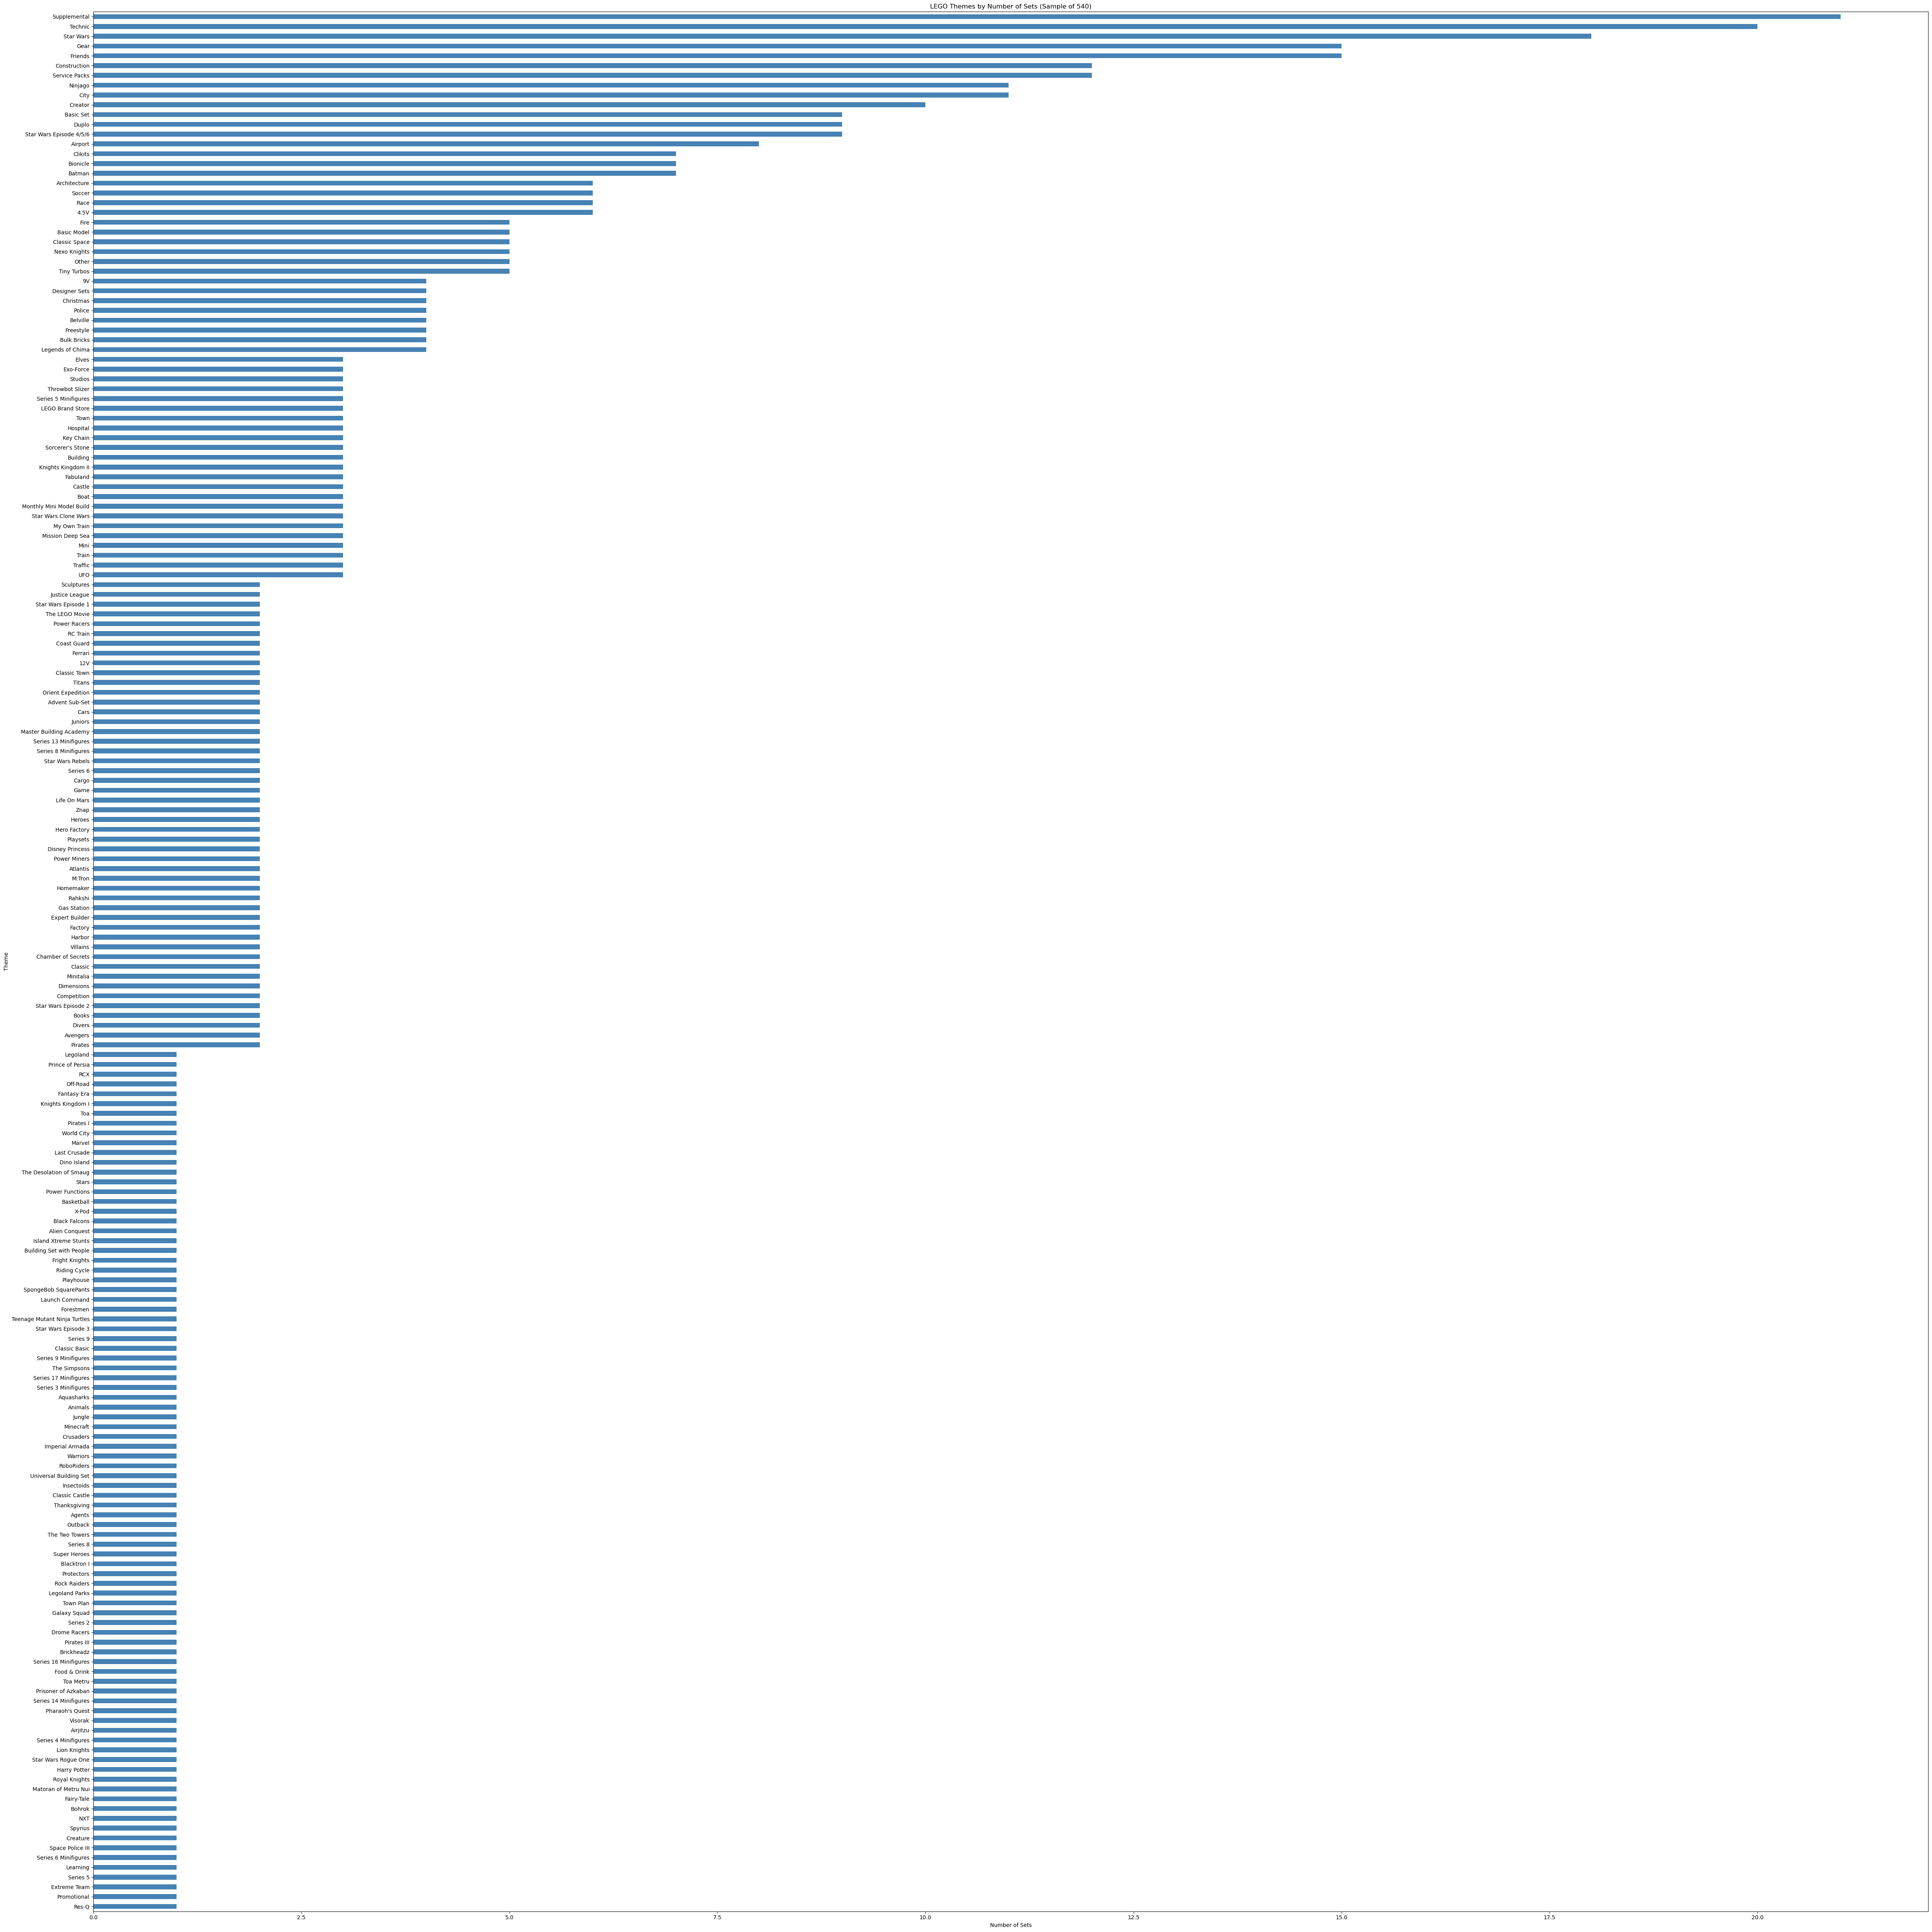

In [8]:
theme_counts = sample_combined['name_y'].value_counts()
plt.figure(figsize=(50, 50))
theme_counts.plot(kind='barh', color='steelblue')
plt.title('LEGO Themes by Number of Sets (Sample of 540)')
plt.xlabel('Number of Sets')
plt.ylabel('Theme')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


As you can see above, having 540 rows displayed makes it very hard to see. Instead of taking a sample, I'm going to just take the top 20 themes with the most sets. We will still use the bar graph since it helps display the data in the neatest fashion. For theme_counts we'll just use the combined dataset. And with the value_counts() method we'll also use the head(20), which will give us the top 20 themes with the highest number of sets. This way without the sample taking in random rows this will go through the entire dataset and possibly a more accurate picture.

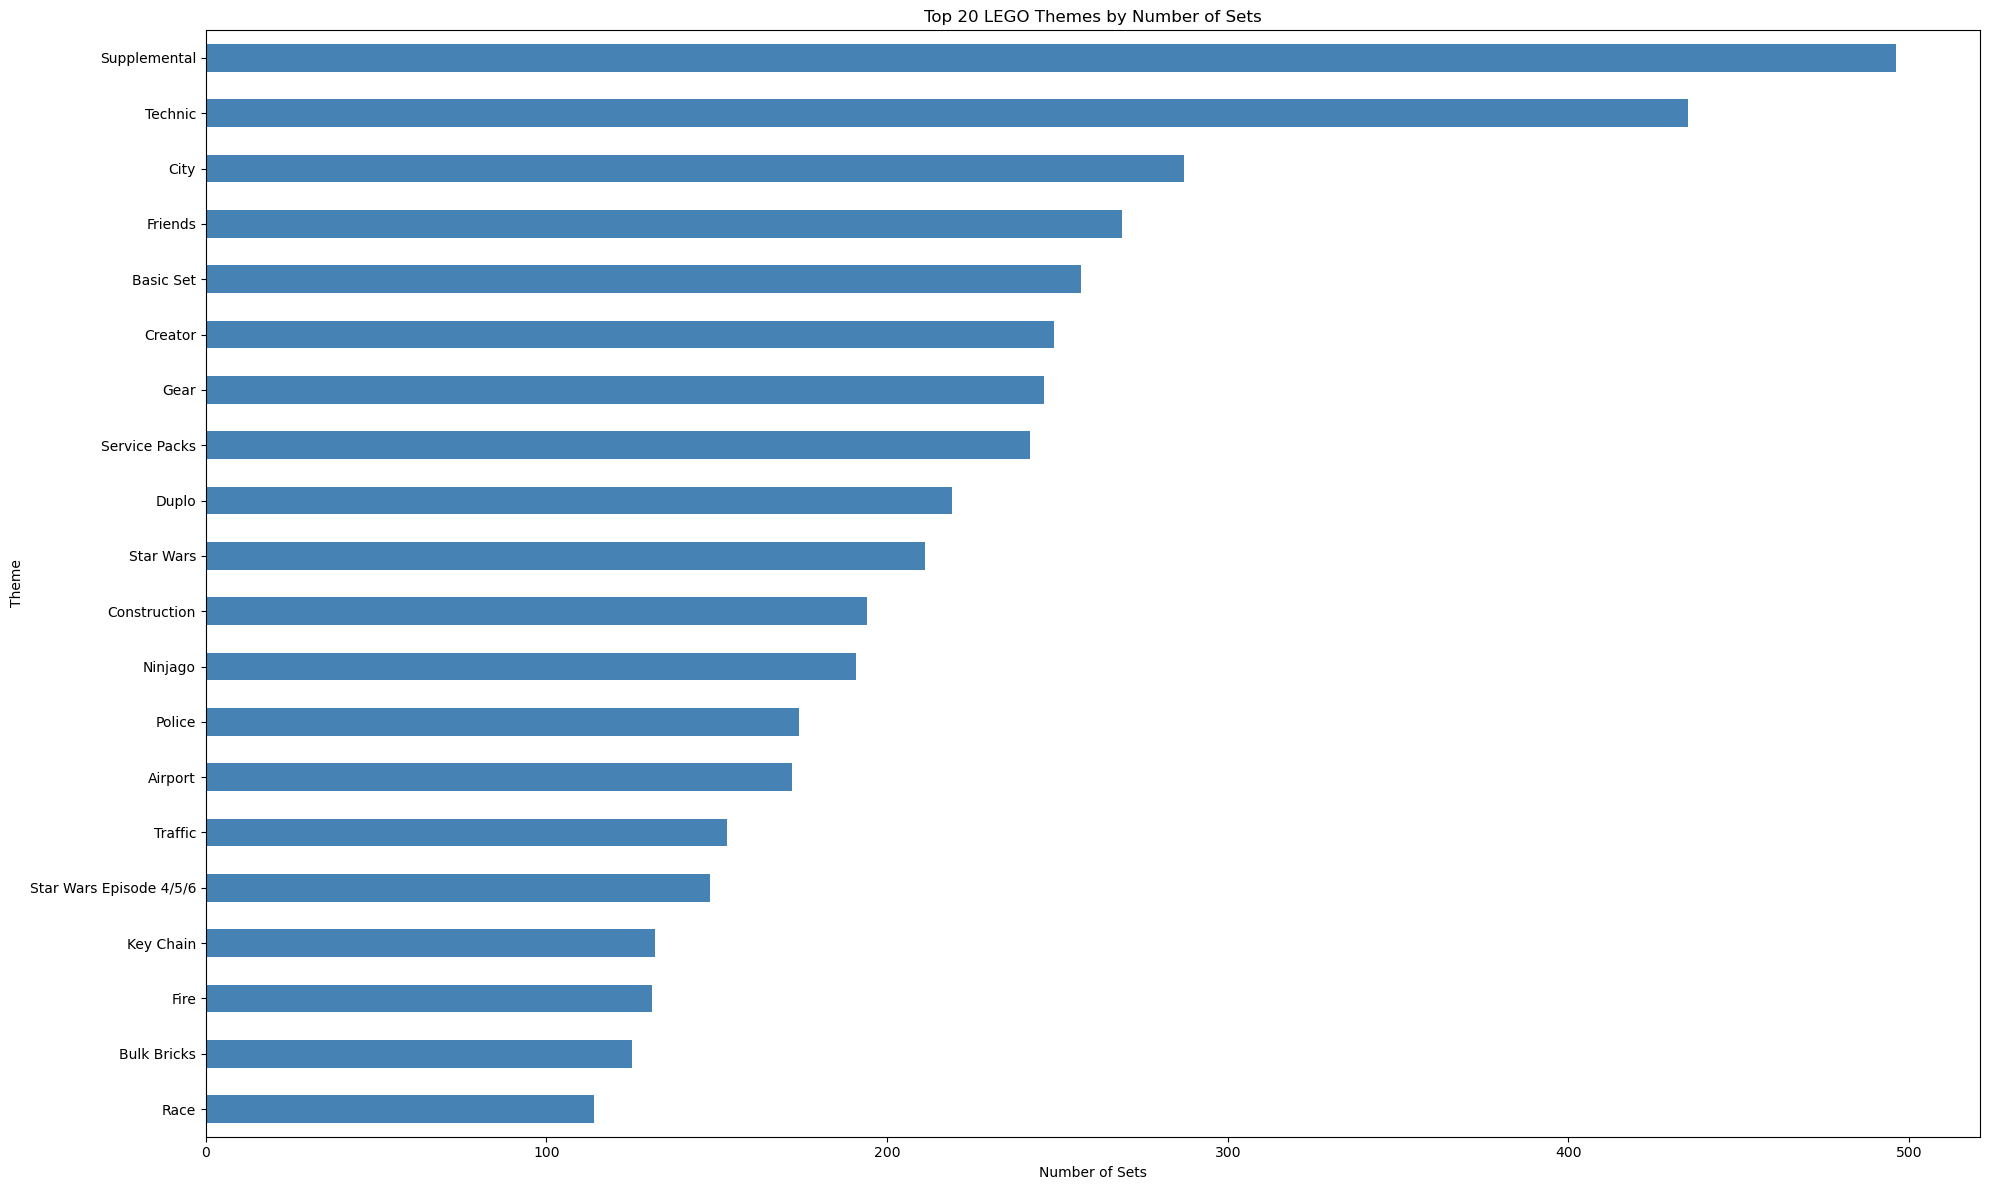

In [11]:
theme_counts = combined['name_y'].value_counts().head(20)
plt.figure(figsize=(20, 12))
theme_counts.plot(kind='barh', color='steelblue')
plt.title('Top 20 LEGO Themes by Number of Sets')
plt.xlabel('Number of Sets')
plt.ylabel('Theme')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Results and Impact

Looking at the graph above, we can see it a lot more clearly. From which themes have the most sets to how many sets are in that theme. While this graph gives us a good representation of the problem we stated above, there are still some minor problems. Looking at this graph we see two different Star Wars themes: "Star Wars" and "Star Wars Episode 4/5/6". There might be some people who will see them separate, but to many they might see it as the same. The impact of this project will most likely result in people buying only sets from the popular themes and create bias.

Some of the questions that I came up with at the top can be answered here with this graph.
- Clearly Supplemental LEGO have the highest number of sets, followed by Technic and City.
- It seems that certain themes like Star Wars, Technic, and Ninjago are able to create many more sets since they stay relevant, even though they first came out in early 2000s.
- Looking at the graph, we can see the 20th most popular theme has barely over 100 sets, so we can assume that most rare and lesser known themes will have fewer sets.